# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tshikapa
Processing Record 2 of Set 1 | key west
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | iwanai
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | san fernando
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | kirkwall
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | gadzhiyevo
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | buka
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | inhambane
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | korla
Processing Record 21 of Set 1 | manismata
Processing Record 22 of Set 1 | kralendijk
Processing Reco

In [4]:
city_data

[{'City': 'tshikapa',
  'Lat': -6.4167,
  'Lng': 20.8,
  'Max Temp': 23.22,
  'Humidity': 93,
  'Cloudiness': 78,
  'Wind Speed': 1.87,
  'Country': 'CD',
  'Date': 1707240325},
 {'City': 'key west',
  'Lat': 24.5557,
  'Lng': -81.7826,
  'Max Temp': 19,
  'Humidity': 77,
  'Cloudiness': 100,
  'Wind Speed': 9.26,
  'Country': 'US',
  'Date': 1707240231},
 {'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 18.01,
  'Humidity': 55,
  'Cloudiness': 0,
  'Wind Speed': 5.66,
  'Country': 'CL',
  'Date': 1707240124},
 {'City': 'iwanai',
  'Lat': 42.9744,
  'Lng': 140.5089,
  'Max Temp': -6.69,
  'Humidity': 95,
  'Cloudiness': 96,
  'Wind Speed': 1.82,
  'Country': 'JP',
  'Date': 1707240326},
 {'City': 'edinburgh of the seven seas',
  'Lat': -37.0676,
  'Lng': -12.3116,
  'Max Temp': 16.85,
  'Humidity': 69,
  'Cloudiness': 8,
  'Wind Speed': 2.94,
  'Country': 'SH',
  'Date': 1707240327},
 {'City': 'san fernando',
  'Lat': 15.0286,
  'Lng': 120.6898,
  'Max Temp': 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tshikapa,-6.4167,20.8000,23.22,93,78,1.87,CD,1707240325
1,key west,24.5557,-81.7826,19.00,77,100,9.26,US,1707240231
2,punta arenas,-53.1500,-70.9167,18.01,55,0,5.66,CL,1707240124
3,iwanai,42.9744,140.5089,-6.69,95,96,1.82,JP,1707240326
4,edinburgh of the seven seas,-37.0676,-12.3116,16.85,69,8,2.94,SH,1707240327


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tshikapa,-6.4167,20.8000,23.22,93,78,1.87,CD,1707240325
1,key west,24.5557,-81.7826,19.00,77,100,9.26,US,1707240231
2,punta arenas,-53.1500,-70.9167,18.01,55,0,5.66,CL,1707240124
3,iwanai,42.9744,140.5089,-6.69,95,96,1.82,JP,1707240326
4,edinburgh of the seven seas,-37.0676,-12.3116,16.85,69,8,2.94,SH,1707240327


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

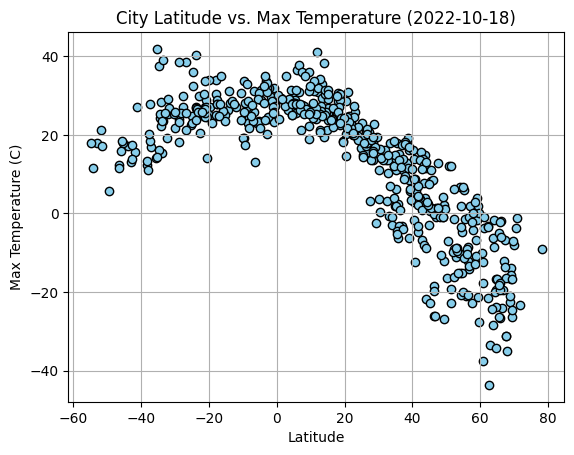

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c="skyblue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

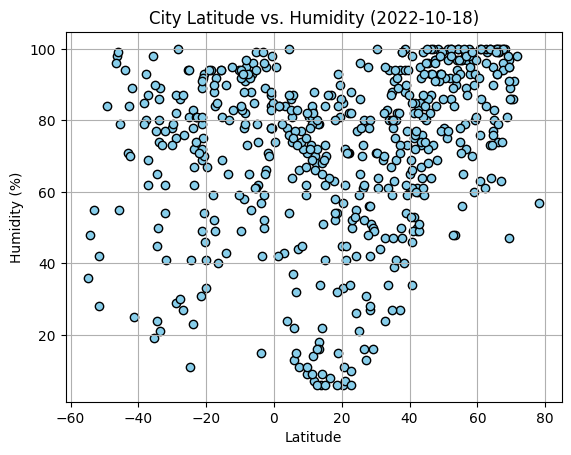

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c="skyblue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

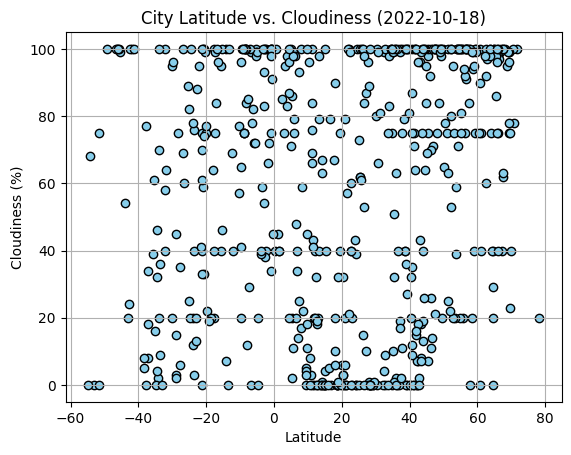

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c="skyblue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

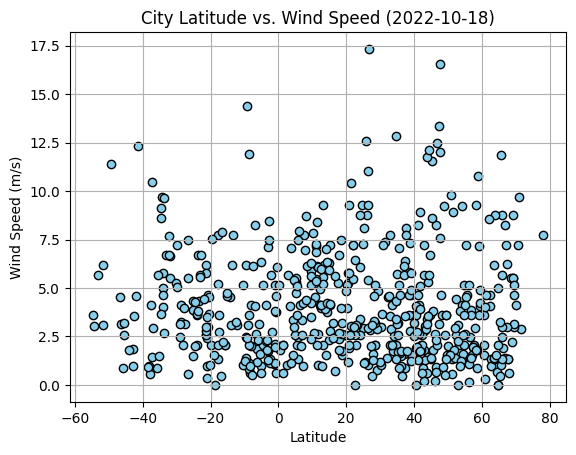

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c="skyblue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def lin_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text((min(x_values)), (min(y_values)),equation, fontsize=12, color="red")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
data = pd.read_csv("../output_data/cities.csv")
data_df = pd.DataFrame(data)
northern_hemi_df = data.loc[data["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,key west,24.5557,-81.7826,19.00,77,100,9.26,US,1707240231
3,3,iwanai,42.9744,140.5089,-6.69,95,96,1.82,JP,1707240326
5,5,san fernando,15.0286,120.6898,23.85,84,4,2.32,PH,1707240327
8,8,kirkwall,58.9848,-2.9587,4.03,60,40,10.80,GB,1707240329
9,9,tiksi,71.6872,128.8694,-23.40,98,100,2.87,RU,1707240240


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = data.loc[data["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,tshikapa,-6.4167,20.8000,23.22,93,78,1.87,CD,1707240325
2,2,punta arenas,-53.1500,-70.9167,18.01,55,0,5.66,CL,1707240124
4,4,edinburgh of the seven seas,-37.0676,-12.3116,16.85,69,8,2.94,SH,1707240327
6,6,blackmans bay,-43.0167,147.3167,13.07,71,20,1.85,AU,1707240210
7,7,waitangi,-43.9535,-176.5597,17.12,94,54,1.79,NZ,1707240328


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7867421438408824


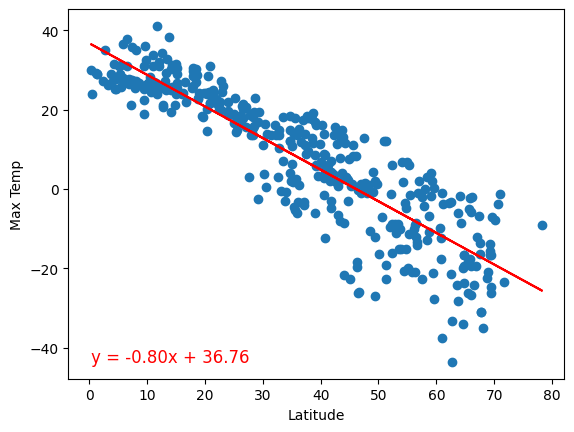

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

lin_reg(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-squared is: 0.21260896485291966


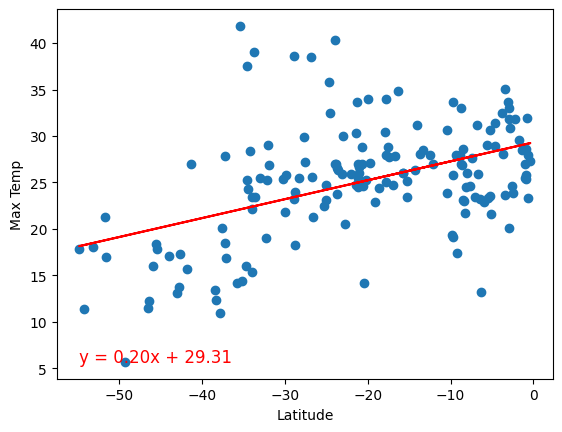

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

lin_reg(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** In the Northern hemisphere, max temp is highly positively correlated with latitude i.e. the higher the latitude, the higher the max temp (r-squared=.744). Similarly, the Southern hemsiphere's max temp and latitude values have a positive correlation however much less dramatic with low correlation (r-squared=.247).

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2290476819141049


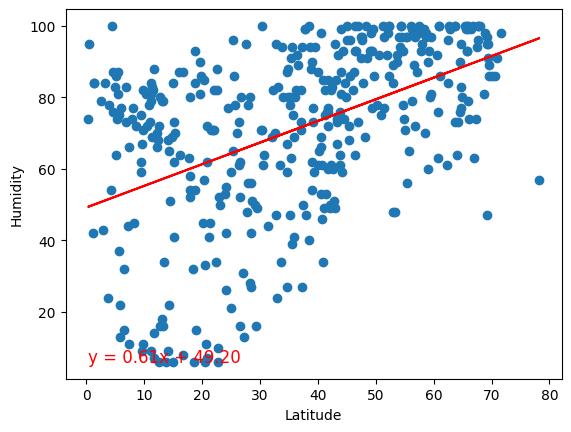

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

lin_reg(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-squared is: 0.038417038531492274


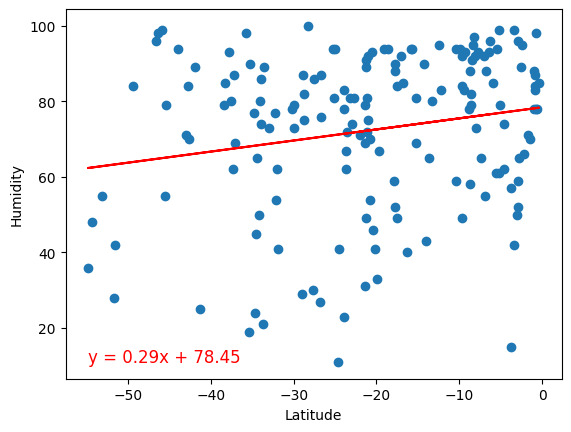

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

lin_reg(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Humidity and latitude are positively correlated in the Northern hemisphere however there is only a fairly low correlation (r-squared=.268). In the Southern hemisphere, there is very little correlation between humidity and latitude (r-squared=.041).

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11501509081759934


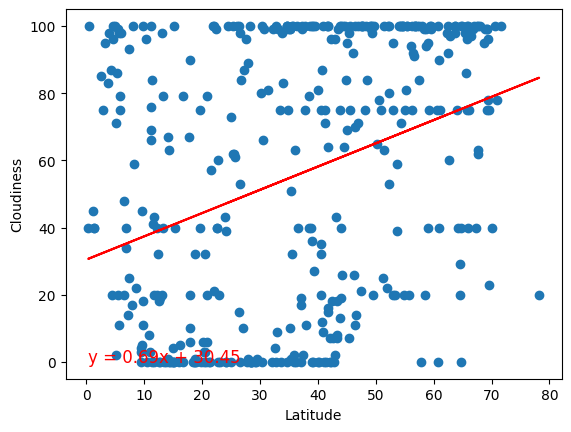

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

lin_reg(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-squared is: 0.07323696250193958


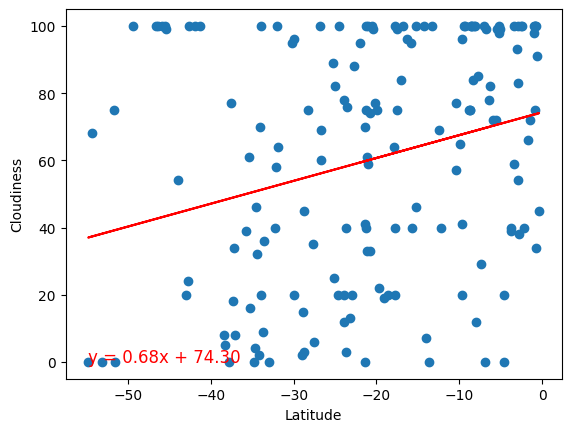

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

lin_reg(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** Cloudiness and latitude have a positive correlation in both the Northern and Southern hemispheres, however this correlation is low in the Northern hemisphere (r-squared=.126) and even lower in the Southern hemisphere (r-squared=.057).

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.005130223603501982


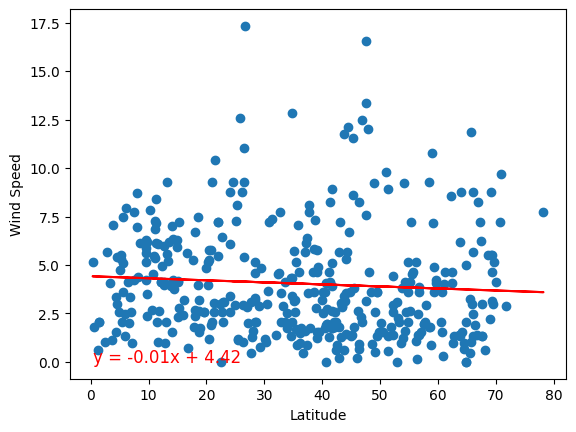

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

lin_reg(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-squared is: 0.026028599176715368


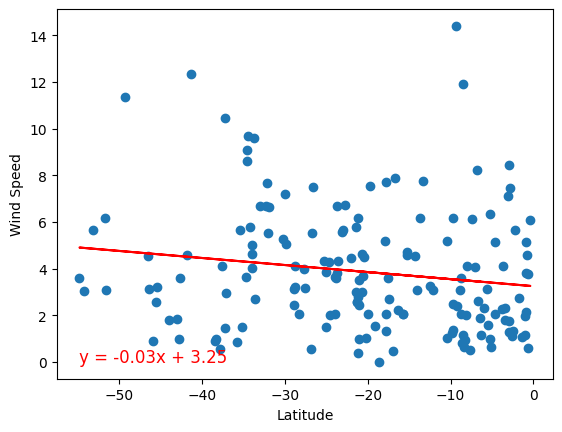

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

lin_reg(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** Wind speed and latitude are not correlated in the Northern hemisphere (r-squared=.001), however there is a slight negative correlatioin between wind speed and latitude in the Southern hemisphere (r-squared=.079)